<a href="https://colab.research.google.com/github/5dongdong/PY_AI/blob/master/model/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ai_mini_project/medical_noshow.csv')  
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.drop('AppointmentID', axis=1, inplace=True) # AppointmentID 열 제거 

# AppointmentDay - ScheduledDay 값을 계산하여 새로운 열 생성
df['DateDifference'] = (pd.to_datetime(df['AppointmentDay']).dt.date - pd.to_datetime(df['ScheduledDay']).dt.date).dt.days

In [5]:
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDifference
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
 13  DateDifference  110527 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.drop('ScheduledDay', axis=1, inplace=True) # AppointmentID 열 제거 
df.drop('AppointmentDay', axis=1, inplace=True) # AppointmentID 열 제거 
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDifference
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [8]:
# object 열 추출
object_columns = df.select_dtypes(include='object').columns

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# LabelEncoder를 사용하여 object 열 변환
for column in object_columns:
    df[column] = encoder.fit_transform(df[column])

# 변환된 데이터 확인
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDifference
0,2.987250e+13,0,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,1,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,0,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,0,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,0,56,39,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,0,56,43,0,0,0,0,0,1,0,35
110523,3.596266e+12,0,51,43,0,0,0,0,0,1,0,35
110524,1.557663e+13,0,21,43,0,0,0,0,0,1,0,41
110525,9.213493e+13,0,38,43,0,0,0,0,0,1,0,41


In [9]:
df.drop('PatientId', axis=1, inplace=True) # AppointmentID 열 제거 
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DateDifference
0,0,62,39,0,1,0,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1,0,35
110523,0,51,43,0,0,0,0,0,1,0,35
110524,0,21,43,0,0,0,0,0,1,0,41
110525,0,38,43,0,0,0,0,0,1,0,41


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Gender          110527 non-null  int64
 1   Age             110527 non-null  int64
 2   Neighbourhood   110527 non-null  int64
 3   Scholarship     110527 non-null  int64
 4   Hipertension    110527 non-null  int64
 5   Diabetes        110527 non-null  int64
 6   Alcoholism      110527 non-null  int64
 7   Handcap         110527 non-null  int64
 8   SMS_received    110527 non-null  int64
 9   No-show         110527 non-null  int64
 10  DateDifference  110527 non-null  int64
dtypes: int64(11)
memory usage: 9.3 MB


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

import tensorflow as tf
tf.random.set_seed(77)  # weight 의 난수값 조정

In [12]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'DateDifference'],
      dtype='object')

In [13]:
# x = df[['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
#        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 
#        'DateDifference']]
x = df[['Gender', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]

In [14]:
y = df[['No-show']]
y

,No-show
0,0
1,0
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [15]:
x

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,1
110523,0,0,0,0,0,0,1
110524,0,0,0,0,0,0,1
110525,0,0,0,0,0,0,1


In [16]:
# drop_features
# x = np.delete(x, 1, axis=1)
# cv pred acc :  0.9333333333333333
# x = np.delete(x, 0, axis=1)
# cv pred acc :  1.0
# x = np.delete(x, [0, 1], axis=1)
# cv pred acc :  1.0

x_train, x_test, y_train,y_test = train_test_split(
    x, y, train_size=0.8, shuffle=True, random_state=42

)

In [17]:
# kfold
n_splits = 11    # 보통 홀수로 들어감
random_state = 42
kfold = KFold(n_splits=n_splits, shuffle=True, 
              random_state=random_state)

# Scaler
scaler = MinMaxScaler() # 0.8005066497783407
# scaler = StandardScaler() # 0.8005066497783407
# scaler = MaxAbsScaler() # 0.8005066497783407
# scaler = RobustScaler() # 0.8005066497783407

scaler.fit(x_train)                 # train 은 fit, transform 모두 해줘야 함
x = scaler.transform(x_train) # train 은 fit, transform 모두 해줘야 함
x = scaler.transform(x_test) 

In [18]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


In [19]:
# 2. 모델
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


# 3. 훈련
model.fit(x_train, y_train)


<ipython-input-19-f4789935ea85>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier()

In [20]:
#4. 평가, 예측
result = model.score(x_test,y_test)
#print('결과 acc : ', result)
#print('결과 r2 : ', result)

score = cross_val_score( model, 
                        x_train, y_train,
                        cv = kfold ) #cv = cross validation_

#print('cv acc : ', score)
y_predict = cross_val_predict(model,
                              x_test, y_test,
                              cv = kfold)
#print('cv pred : ', y_predict)

acc = accuracy_score(y_test, y_predict)
print('cv pred acc : ', acc )
print('결과 acc : ', result)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

cv pred acc :  0.7991495521577853
결과 acc :  0.7996471546186555


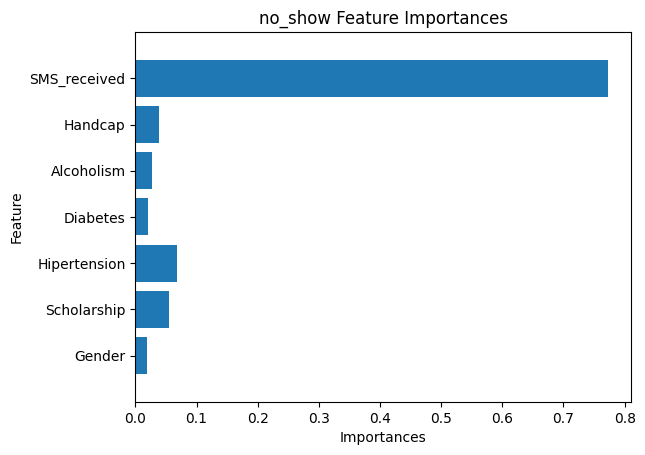

In [21]:
# 시각화
import matplotlib.pyplot as plt
n_features = x.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.title('no_show Feature Importances')
plt.ylabel('Feature')
plt.xlabel('Importances')
plt.ylim(-1, n_features)

plt.show()